In [1]:
from fair import emissions_driven
import pyam
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9);

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


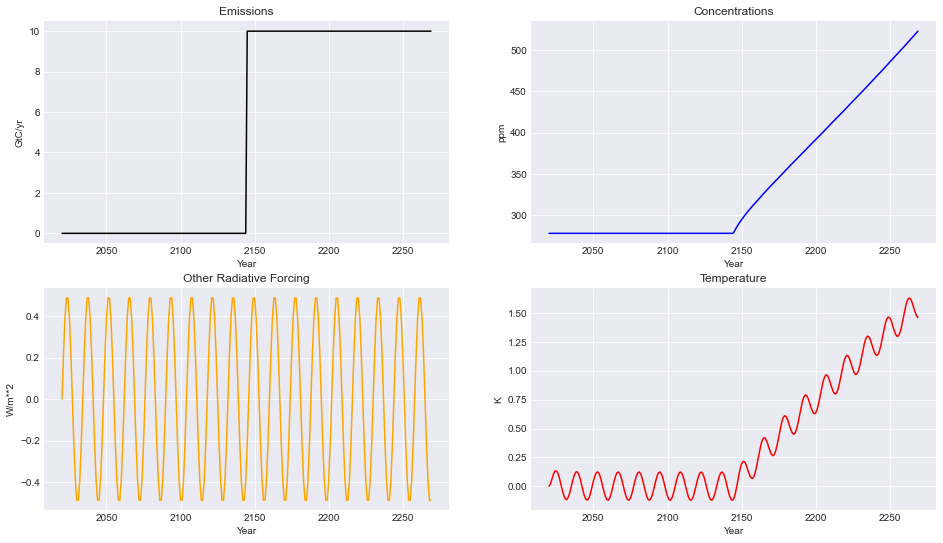

In [2]:
input_df = pd.DataFrame(
        [
            [
                "model_a",
                "scen_a",
                "World",
                "Emissions|CO2",
                "GtC/yr",
                *125*[0],
                *125*[10]
            ],
            [
                "model_a",
                "scen_a",
                "World",
                "Effective Radiative Forcing|Other",
                "W/m**2",
                *[0.5 * np.sin(2 * np.pi * (x) / 14.0) for x in range(250)]
            ],
        ],
        columns=pyam.IAMC_IDX + [*range(2020,2270)],
    )

pyam_inp_df = pyam.IamDataFrame(input_df)
cfg = {}

pyam_out_df = emissions_driven.run(pyam_inp_df, cfg)


pyam_emissions_df = pyam_out_df.filter(variable = 'Emissions|CO2')
pyam_concentrations_df = pyam_out_df.filter(variable = 'Atmospheric Concentrations|CO2')
pyam_other_forcing_df = pyam_out_df.filter(variable = 'Effective Radiative Forcing|Other')
pyam_temperature_df = pyam_out_df.filter(variable = 'Surface Temperature')

fig = plt.figure()
ax1 = fig.add_subplot(221)
pyam_emissions_df.line_plot(ax = ax1, title = 'Emissions', legend = False, color = 'black')
ax2 = fig.add_subplot(222)
pyam_concentrations_df.line_plot(ax = ax2, title = 'Concentrations', legend = False, color = 'blue')
ax3 = fig.add_subplot(223)
pyam_other_forcing_df.line_plot(ax = ax3, title = 'Other Radiative Forcing', legend = False, color = 'orange')
ax4 = fig.add_subplot(224)
pyam_temperature_df.line_plot(ax = ax4, title = 'Temperature', legend = False, color = 'red');

pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP3PD.csv`
pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP45.csv`
pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP6.csv`
pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP85.csv`


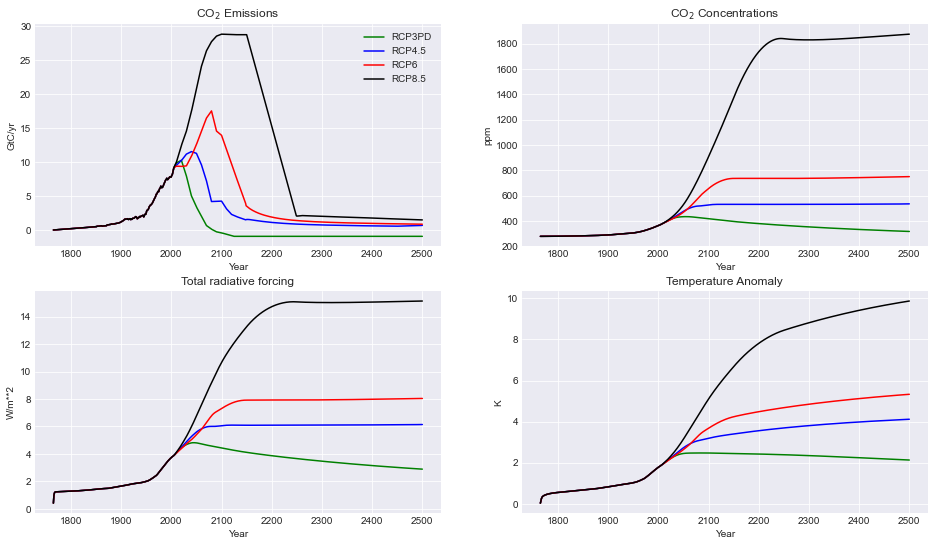

In [3]:
from fair.RCPs import rcp3pd, rcp45, rcp6, rcp85;

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

cfg = {}

pyam_out_df_3pd = emissions_driven.run(rcp3pd.Emissions.emissions, cfg);
pyam_out_df_3pd.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP3PD', color = 'green')

pyam_out_df_45 = emissions_driven.run(rcp45.Emissions.emissions, cfg);
pyam_out_df_45.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP4.5', color = 'blue')

pyam_out_df_6 = emissions_driven.run(rcp6.Emissions.emissions, cfg);
pyam_out_df_6.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP6', color = 'red')

pyam_out_df_85 = emissions_driven.run(rcp85.Emissions.emissions, cfg);
pyam_out_df_85.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP8.5', color = 'black')

ax1.set_title("CO$_2$ Emissions")
ax2.set_title("CO$_2$ Concentrations")
ax3.set_title("Total radiative forcing")
ax4.set_title("Temperature Anomaly")


ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

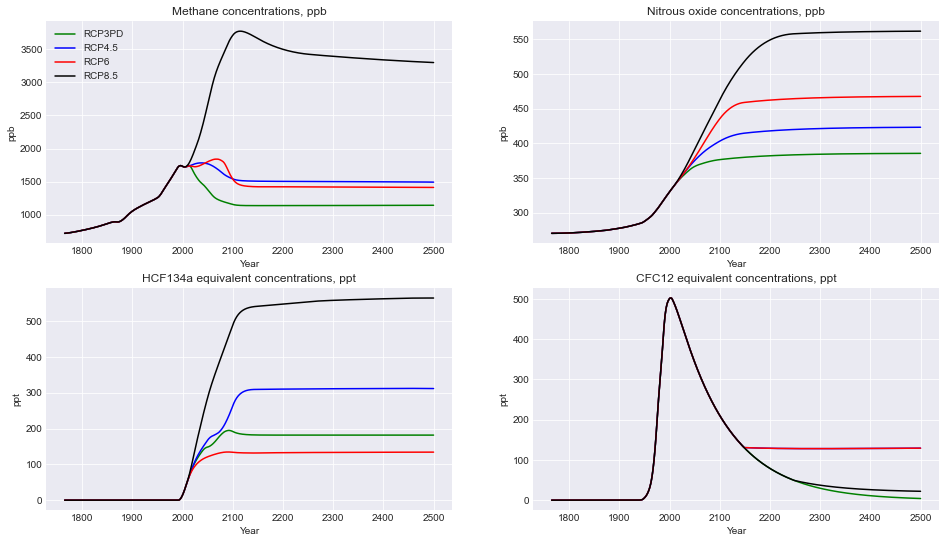

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP3PD', color = 'green')

pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP4.5', color = 'blue')

pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP6', color = 'red')

pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP8.5', color = 'black')


ax1.set_title("Methane concentrations, ppb")
ax2.set_title("Nitrous oxide concentrations, ppb")
ax3.set_title("HCF134a equivalent concentrations, ppt")
ax4.set_title("CFC12 equivalent concentrations, ppt")

ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

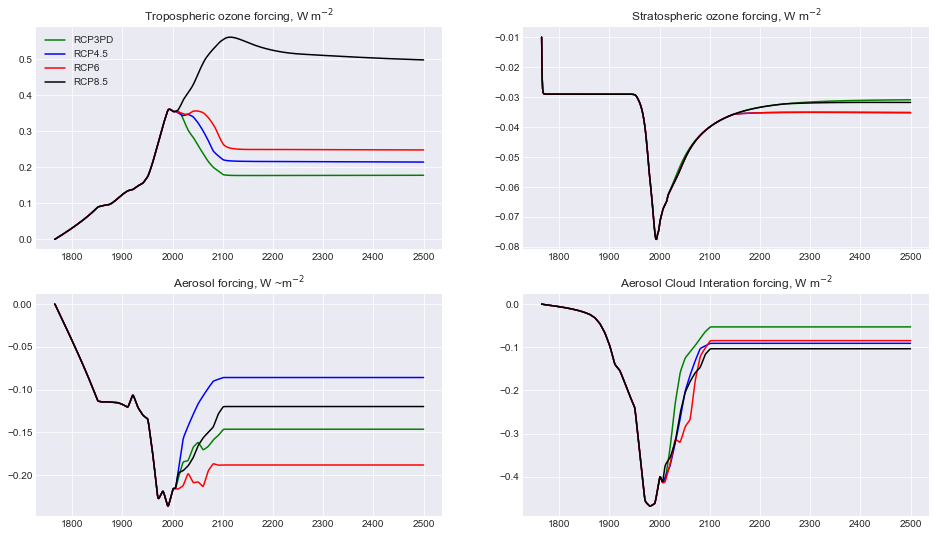

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(pyam_out_df_3pd.filter(variable = 'Effective Radiative Forcing*Tropospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP3PD', color = 'green')
ax2.plot(pyam_out_df_3pd.filter(variable = 'Effective Radiative Forcing*Stratospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP3PD', color = 'green')
ax3.plot(pyam_out_df_3pd.filter(variable = ['Effective Radiative Forcing|Sulfur','Effective Radiative Forcing|CO','Effective Radiative Forcing|VOC','Effective Radiative Forcing|NOx','Effective Radiative Forcing|BC','Effective Radiative Forcing|OC','Effective Radiative Forcing|NH3']).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP3PD', color = 'green')
ax4.plot(pyam_out_df_3pd.filter(variable = ['Effective Radiative Forcing|Sulfur|Aerosol Cloud Interaction','Effective Radiative Forcing|BC|Aerosol Cloud Interaction','Effective Radiative Forcing|OC|Aerosol Cloud Interaction',]).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP3PD', color = 'green')

ax1.plot(pyam_out_df_45.filter(variable = 'Effective Radiative Forcing*Tropospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP4.5', color = 'blue')
ax2.plot(pyam_out_df_45.filter(variable = 'Effective Radiative Forcing*Stratospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP4.5', color = 'blue')
ax3.plot(pyam_out_df_45.filter(variable = ['Effective Radiative Forcing|Sulfur','Effective Radiative Forcing|CO','Effective Radiative Forcing|VOC','Effective Radiative Forcing|NOx','Effective Radiative Forcing|BC','Effective Radiative Forcing|OC','Effective Radiative Forcing|NH3']).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP4.5', color = 'blue')
ax4.plot(pyam_out_df_45.filter(variable = ['Effective Radiative Forcing|Sulfur|Aerosol Cloud Interaction','Effective Radiative Forcing|BC|Aerosol Cloud Interaction','Effective Radiative Forcing|OC|Aerosol Cloud Interaction',]).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP4.5', color = 'blue')

ax1.plot(pyam_out_df_6.filter(variable = 'Effective Radiative Forcing*Tropospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP6', color = 'red')
ax2.plot(pyam_out_df_6.filter(variable = 'Effective Radiative Forcing*Stratospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP6', color = 'red')
ax3.plot(pyam_out_df_6.filter(variable = ['Effective Radiative Forcing|Sulfur','Effective Radiative Forcing|CO','Effective Radiative Forcing|VOC','Effective Radiative Forcing|NOx','Effective Radiative Forcing|BC','Effective Radiative Forcing|OC','Effective Radiative Forcing|NH3']).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP6', color = 'red')
ax4.plot(pyam_out_df_6.filter(variable = ['Effective Radiative Forcing|Sulfur|Aerosol Cloud Interaction','Effective Radiative Forcing|BC|Aerosol Cloud Interaction','Effective Radiative Forcing|OC|Aerosol Cloud Interaction',]).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP6', color = 'red')

ax1.plot(pyam_out_df_85.filter(variable = 'Effective Radiative Forcing*Tropospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP8.5', color = 'black')
ax2.plot(pyam_out_df_85.filter(variable = 'Effective Radiative Forcing*Stratospheric O3').as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP8.5', color = 'black')
ax3.plot(pyam_out_df_85.filter(variable = ['Effective Radiative Forcing|Sulfur','Effective Radiative Forcing|CO','Effective Radiative Forcing|VOC','Effective Radiative Forcing|NOx','Effective Radiative Forcing|BC','Effective Radiative Forcing|OC','Effective Radiative Forcing|NH3']).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP8.5', color = 'black')
ax4.plot(pyam_out_df_85.filter(variable = ['Effective Radiative Forcing|Sulfur|Aerosol Cloud Interaction','Effective Radiative Forcing|BC|Aerosol Cloud Interaction','Effective Radiative Forcing|OC|Aerosol Cloud Interaction',]).as_pandas().set_index(['variable','year'])['value'].unstack('year').T.sum(axis=1), label = 'RCP8.5', color = 'black')


ax1.set_title("Tropospheric ozone forcing, W m$^{-2}$")
ax2.set_title("Stratospheric ozone forcing, W m$^{-2}$")
ax3.set_title("Aerosol forcing, W ~m$^{-2}$")
ax4.set_title("Aerosol Cloud Interation forcing, W m$^{-2}$")
ax1.legend();